In [1]:
# importing  libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# reading the data
df=pd.read_csv(r'loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [17]:
# i'll drop the id columns
df=df.drop('Loan_ID',axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [18]:
# To check null values
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
# filling the null values
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode(0)[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [22]:
df.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)
df['Credit_History'].fillna(df['Credit_History'].median(),inplace=True)

In [24]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [25]:
# describe the data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [27]:
# chekcing the unique values
df.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [39]:
df.pivot_table(index='Gender')

C:\Users\sachin gavalkar\AppData\Local\Temp\ipykernel_24112\17413917.py:1: FutureWarning: pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.
  df.pivot_table(index='Gender')


,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
Gender,,,,,
Female,4643.473214,1108.008929,0.848214,126.732143,352.500000
Male,5573.017928,1735.752829,0.856574,149.996016,340.159363


# EDA

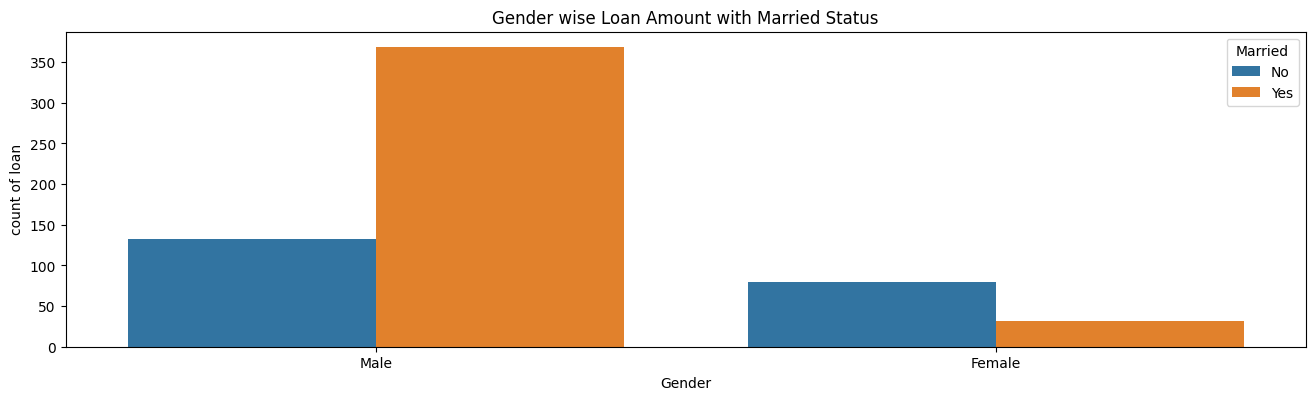

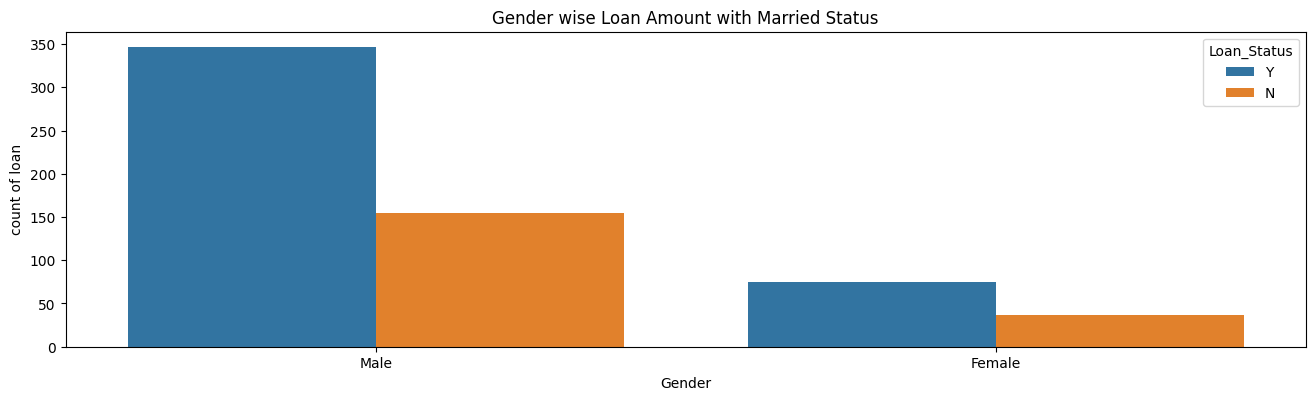

In [92]:
plt.figure(figsize=(16,9))
plt.subplot(2,1,1)
sns.countplot(data=df,x=df['Gender'],hue='Married')
plt.title('Gender wise Loan Amount with Married Status')
plt.xlabel('Gender')
plt.ylabel('count of loan')
plt.show()


plt.figure(figsize=(16,9))
plt.subplot(2,1,2)
sns.countplot(data=df,x=df['Gender'],hue='Loan_Status')
plt.title('Gender wise Loan Amount with Married Status')
plt.xlabel('Gender')
plt.ylabel('count of loan')
plt.show()

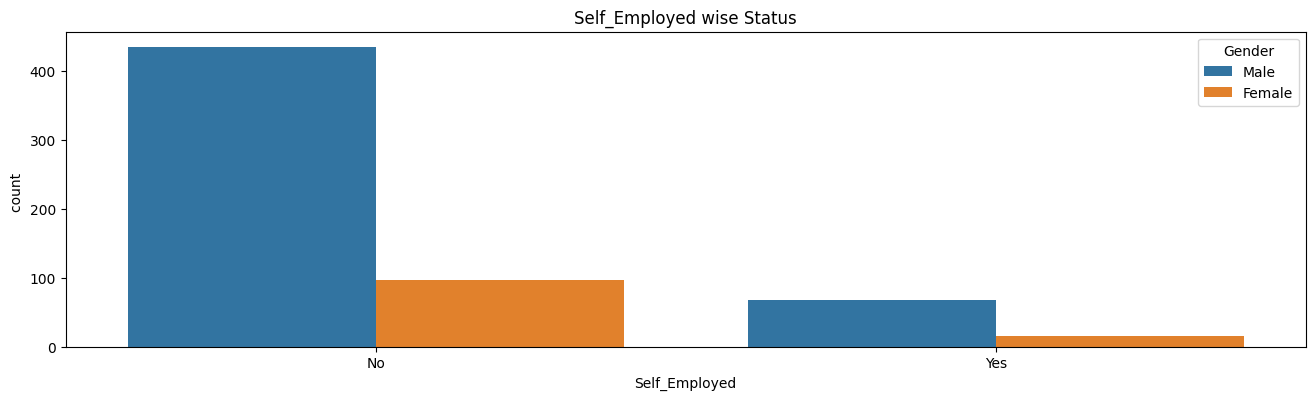

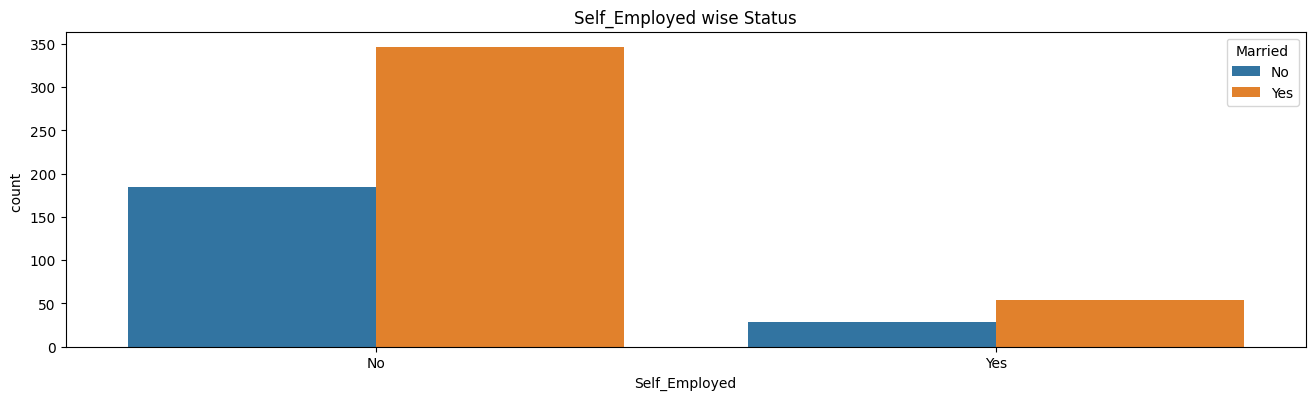

In [90]:

plt.figure(figsize=(16,9))
plt.subplot(2,1,1)
sns.countplot(data=df,x=df['Self_Employed'],hue='Gender')
plt.title('Self_Employed wise Status')
plt.xlabel('Self_Employed')
plt.ylabel('count ')
plt.show()

plt.figure(figsize=(16,9))
plt.subplot(2,1,2)
sns.countplot(data=df,x=df['Self_Employed'],hue='Married')
plt.title('Self_Employed wise Status')
plt.xlabel('Self_Employed')
plt.ylabel('count ')
plt.show()





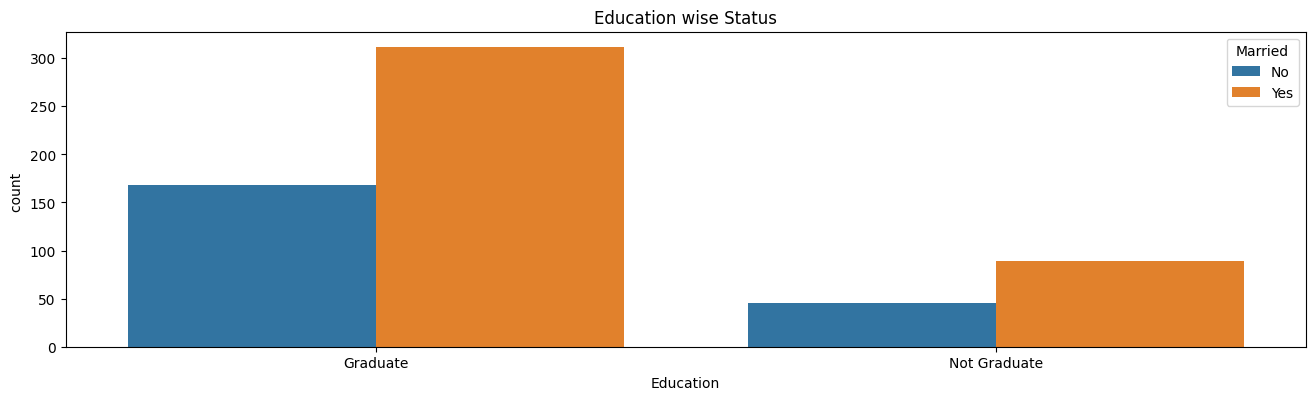

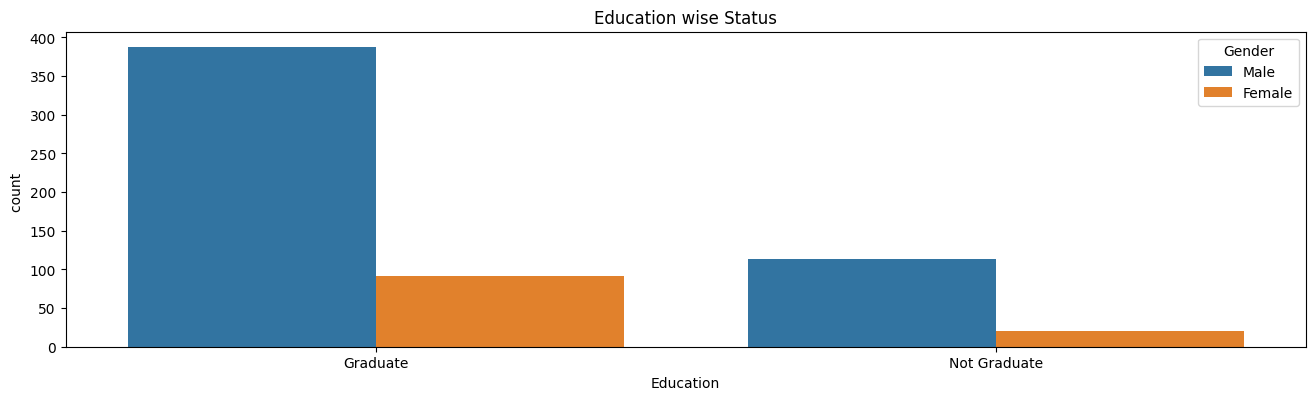

In [93]:
plt.figure(figsize=(16,9))
plt.subplot(2,1,1)
sns.countplot(data=df,x=df['Education'],hue='Married')
plt.title('Education wise Status')
plt.xlabel('Education')
plt.ylabel('count ')
plt.show()

plt.figure(figsize=(16,9))
plt.subplot(2,1,2)
sns.countplot(data=df,x=df['Education'],hue='Gender')
plt.title('Education wise Status')
plt.xlabel('Education')
plt.ylabel('count ')
plt.show()

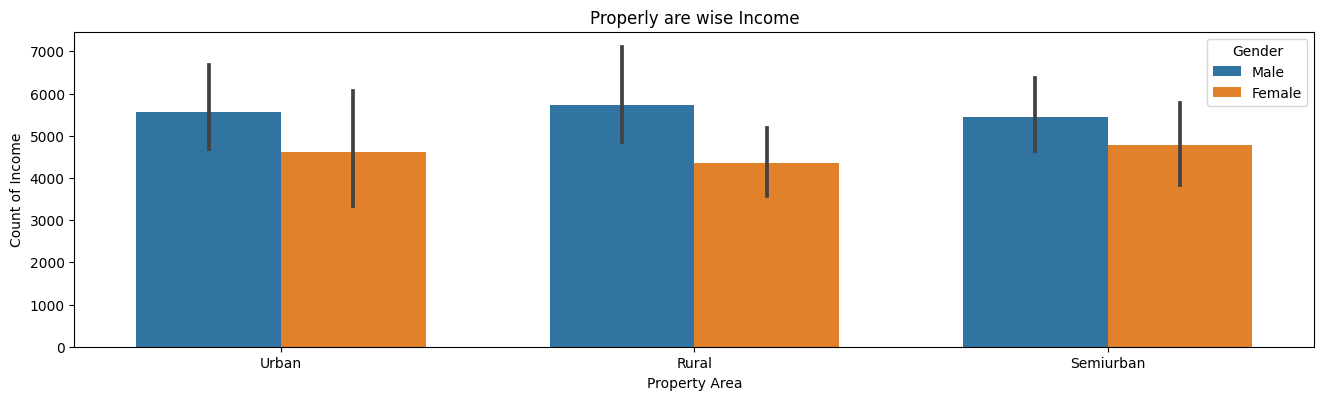

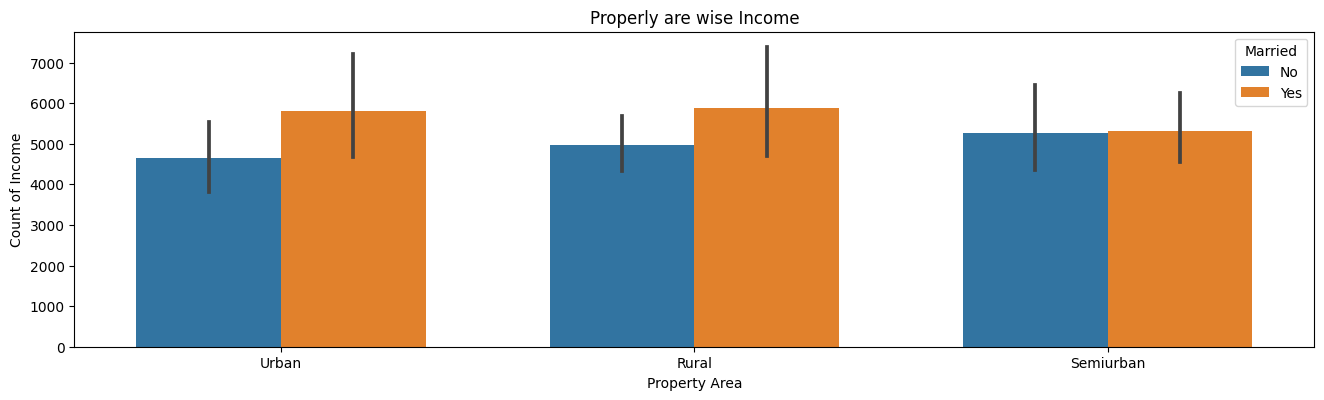

In [94]:
plt.figure(figsize=(16,9))
plt.subplot(2,1,1)
sns.barplot(data=df,x=df['Property_Area'],y=df['ApplicantIncome'],hue='Gender',width=0.7)
plt.title('Properly are wise Income')
plt.xlabel('Property Area')
plt.ylabel('Count of Income')
plt.show()



plt.figure(figsize=(16,9))
plt.subplot(2,1,2)
sns.barplot(data=df,x=df['Property_Area'],y=df['ApplicantIncome'],hue='Married',width=0.7)
plt.title('Properly are wise Income')
plt.xlabel('Property Area')
plt.ylabel('Count of Income')
plt.show()


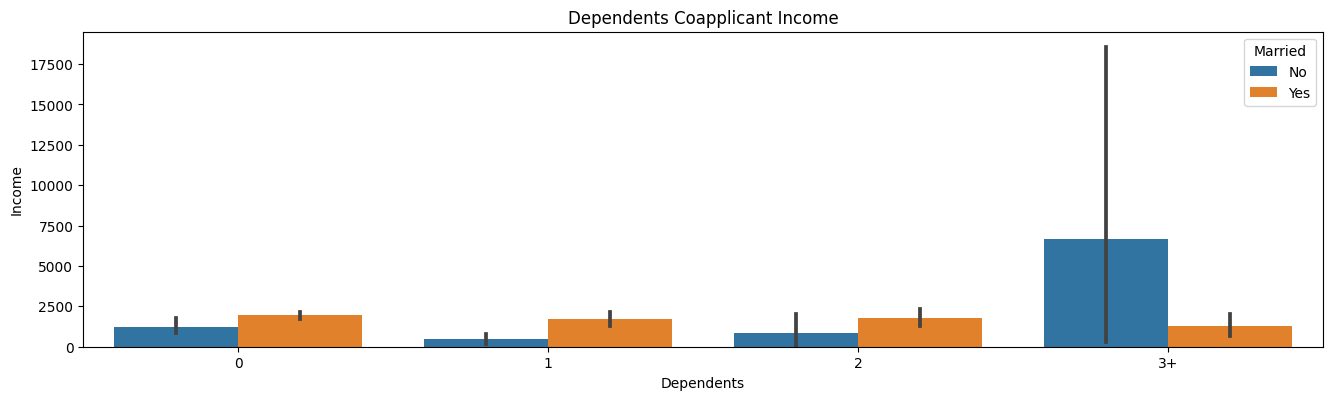

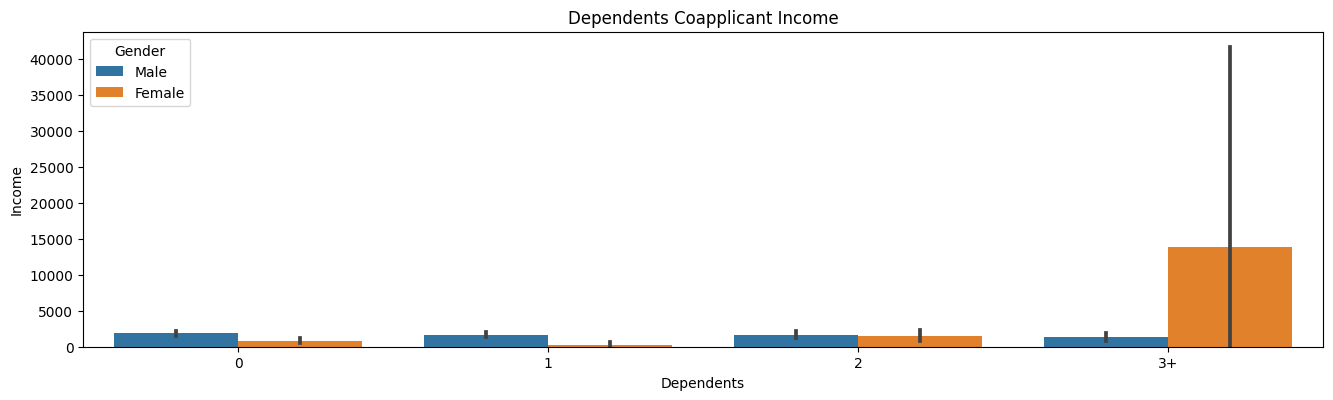

In [98]:
plt.figure(figsize=(16,9))
plt.subplot(2,1,1)
sns.barplot(data=df,x=df['Dependents'],y=df['CoapplicantIncome'],hue='Married')
plt.title('Dependents Coapplicant Income')
plt.xlabel('Dependents')
plt.ylabel('Income')
plt.show()


plt.figure(figsize=(16,9))
plt.subplot(2,1,2)
sns.barplot(data=df,x=df['Dependents'],y=df['CoapplicantIncome'],hue='Gender')
plt.title('Dependents Coapplicant Income')
plt.xlabel('Dependents')
plt.ylabel('Income')
plt.show()

<AxesSubplot: xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

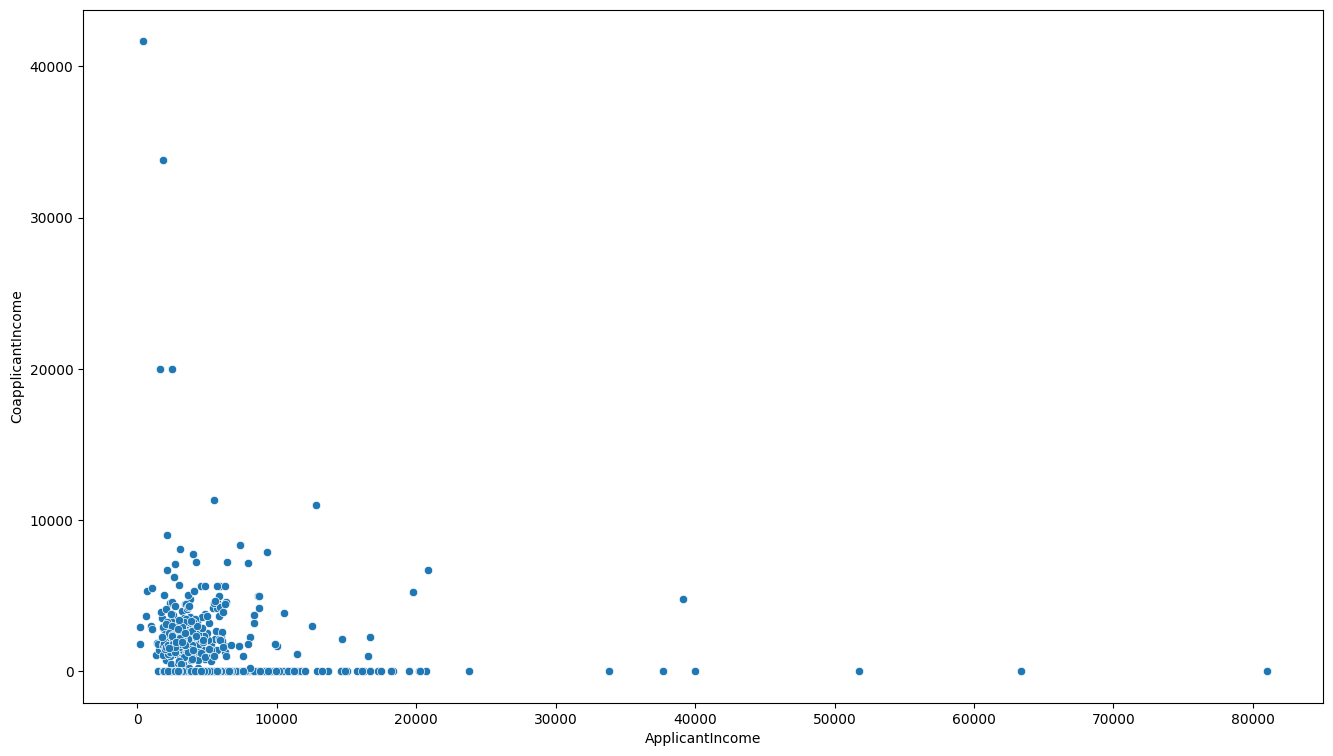

In [55]:
plt.figure(figsize=(16,9))
sns.scatterplot(data=df,x=df['ApplicantIncome'],y=df['CoapplicantIncome'])

<Figure size 1600x900 with 0 Axes>

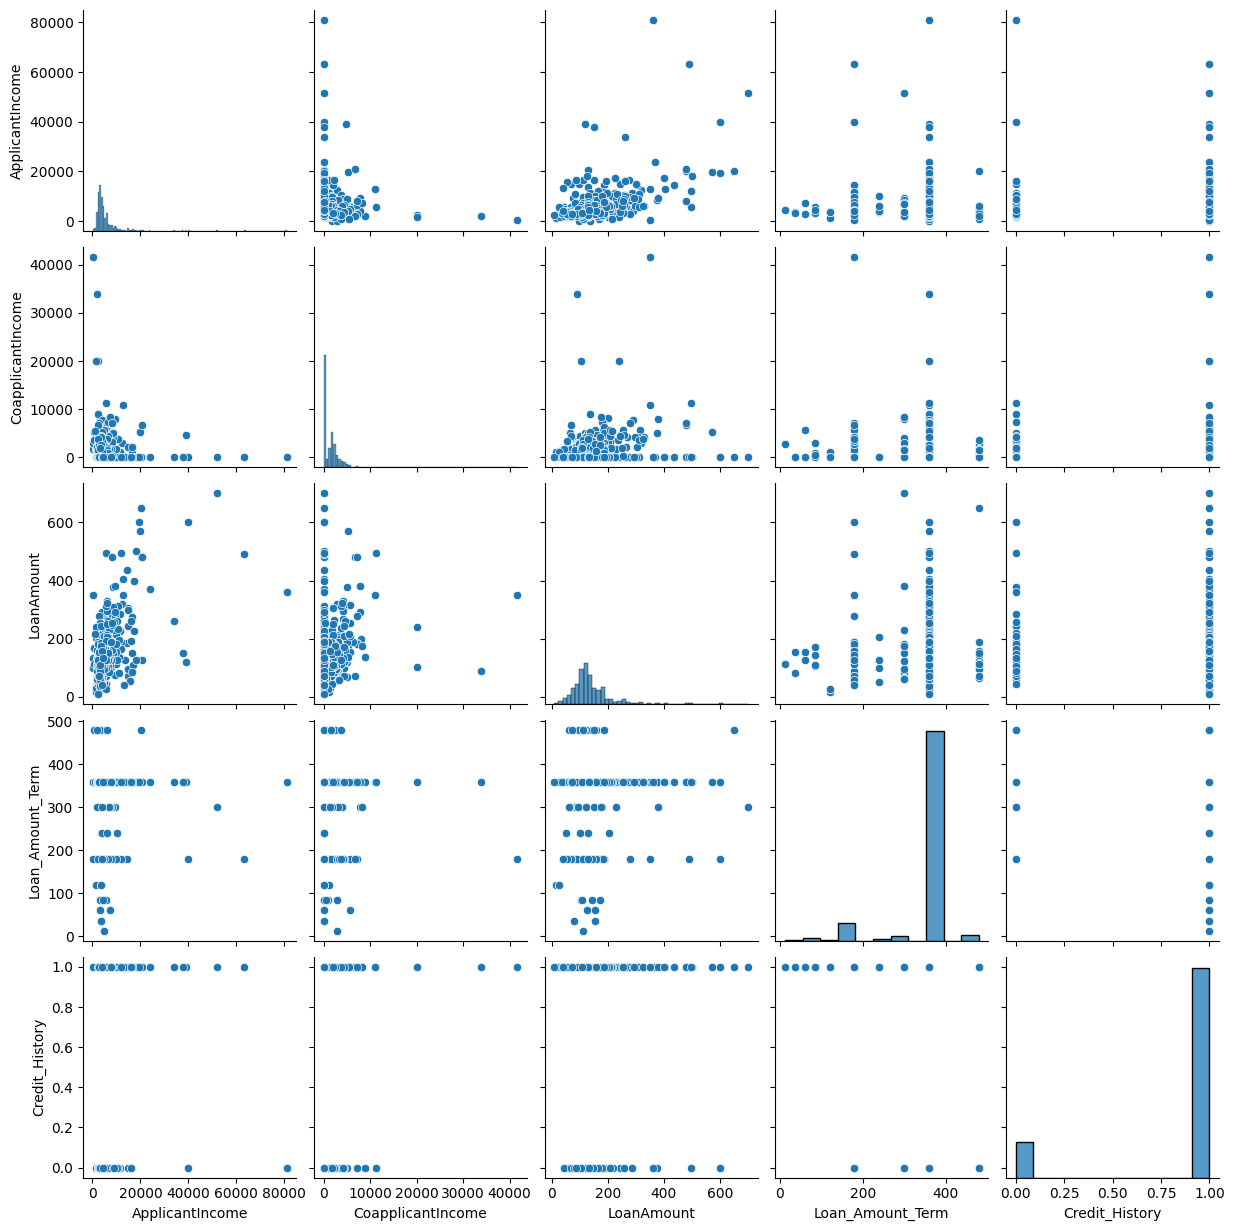

In [57]:
plt.figure(figsize=(16,9))
sns.pairplot(data=df)
plt.show()


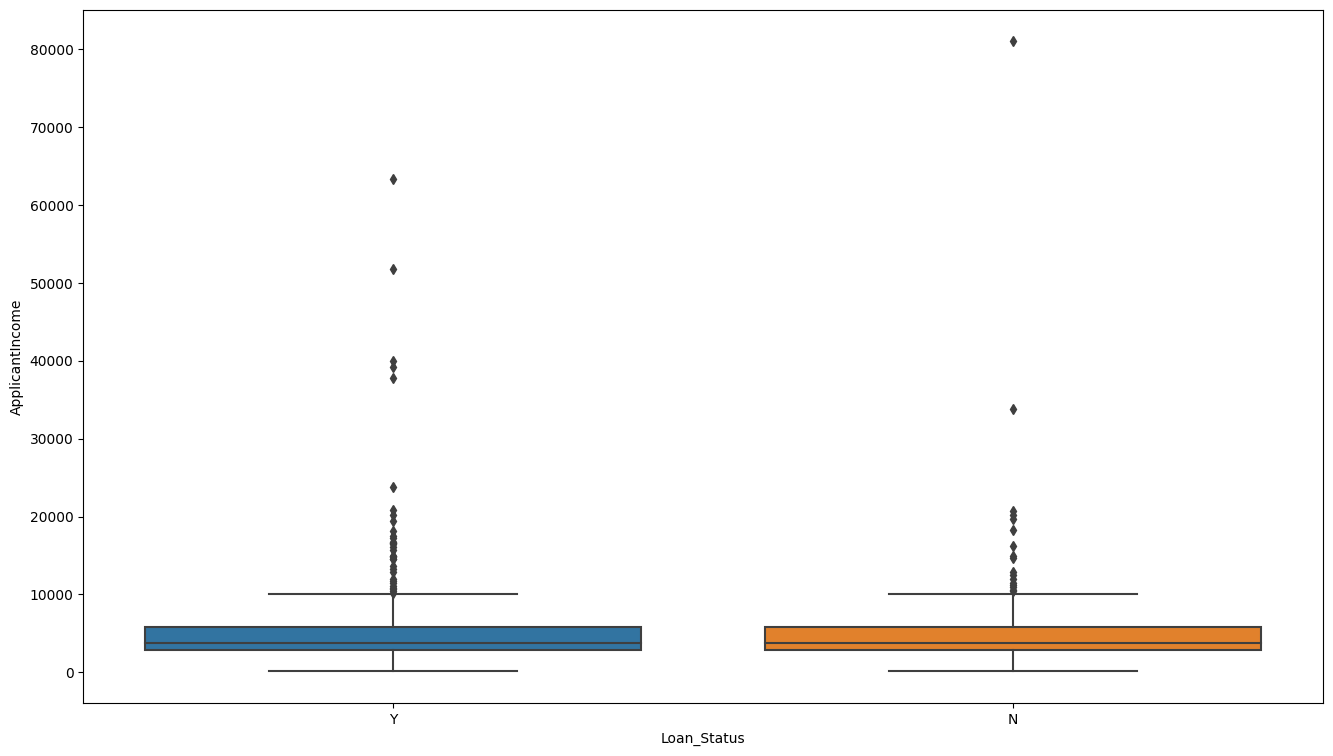

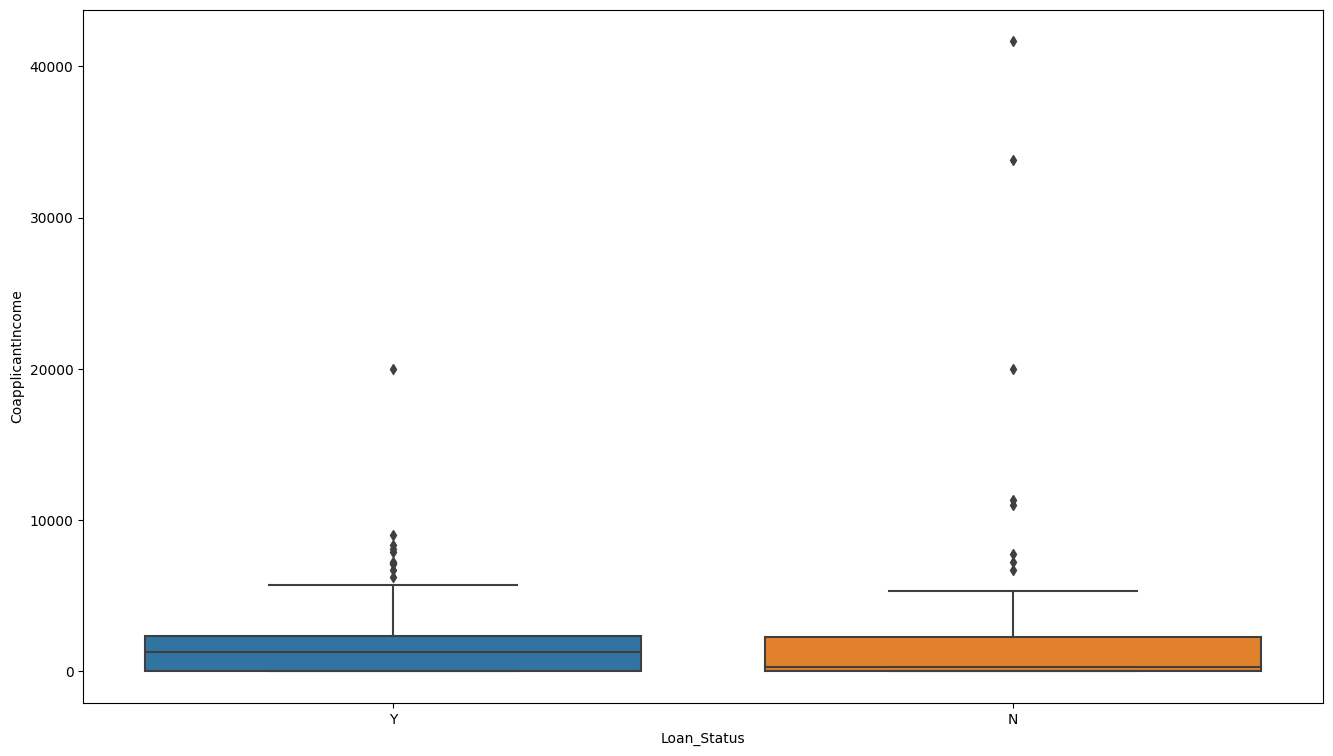

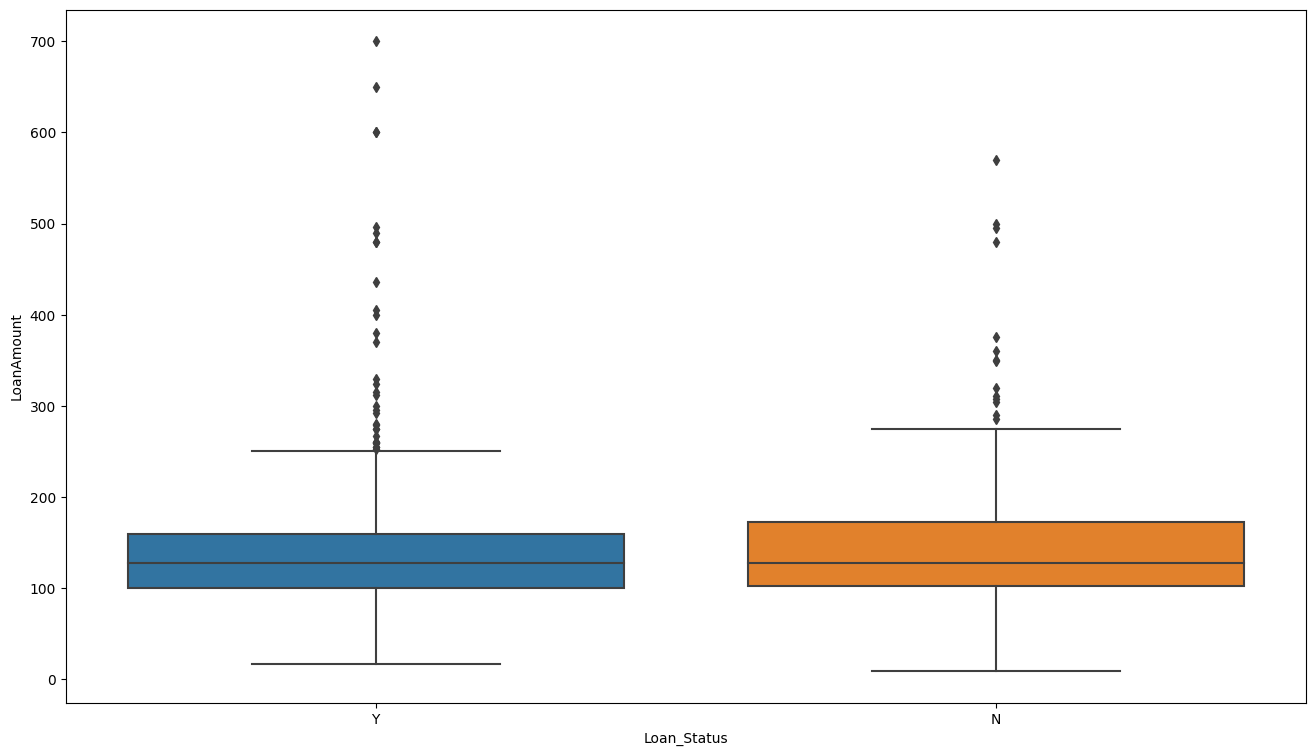

In [104]:
# find out outlier

plt.figure(figsize=(16,9))
sns.boxplot(data=df,x=df['Loan_Status'],y=df['ApplicantIncome'])
plt.show()


plt.figure(figsize=(16,9))
sns.boxplot(data=df,x=df['Loan_Status'],y=df['CoapplicantIncome'])
plt.show()

plt.figure(figsize=(16,9))
sns.boxplot(data=df,x=df['Loan_Status'],y=df['LoanAmount'])
plt.show()


In [107]:
# remove outlier of ApplicantIncome
Q1=df['ApplicantIncome'].quantile(0.25)
Q3=df['ApplicantIncome'].quantile(0.75)

IQR=Q3-Q1

# defining a upper and lower bound
Lower_bound=Q1-1.5*IQR
Upper_bound=Q3+1.5*IQR

df=df[(df['ApplicantIncome']>=Lower_bound)& (df['ApplicantIncome'] <=Upper_bound)]


In [108]:
# remove outlier of CoapplicantsIncome
Q1=df['CoapplicantIncome'].quantile(0.25)
Q3=df['CoapplicantIncome'].quantile(0.75)

IQR=Q3-Q1

# defining a upper and lower bound
Lower_bound=Q1-1.5*IQR
Upper_bound=Q3+1.5*IQR

df=df[(df['CoapplicantIncome']>=Lower_bound)& (df['CoapplicantIncome'] <=Upper_bound)]


In [109]:
# remove outlier of Loan Amount
Q1=df['LoanAmount'].quantile(0.25)
Q3=df['LoanAmount'].quantile(0.75)

IQR=Q3-Q1

# defining a upper and lower bound
Lower_bound=Q1-1.5*IQR
Upper_bound=Q3+1.5*IQR

df=df[(df['LoanAmount']>=Lower_bound)& (df['LoanAmount'] <=Upper_bound)]


In [110]:
# now converting categorical columns into numerical 
cate_cols=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

df=pd.get_dummies(data=df,columns=cate_cols)

In [111]:
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,Y,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,N,0,1,0,1,...,1,0,0,1,0,1,0,1,0,0
2,3000,0.0,66.0,360.0,1.0,Y,0,1,0,1,...,0,0,0,1,0,0,1,0,0,1
3,2583,2358.0,120.0,360.0,1.0,Y,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1
4,6000,0.0,141.0,360.0,1.0,Y,0,1,1,0,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,3232,1950.0,108.0,360.0,1.0,Y,0,1,0,1,...,0,0,0,1,0,1,0,1,0,0
609,2900,0.0,71.0,360.0,1.0,Y,1,0,1,0,...,0,0,0,1,0,1,0,1,0,0
610,4106,0.0,40.0,180.0,1.0,Y,0,1,0,1,...,0,0,1,1,0,1,0,1,0,0
612,7583,0.0,187.0,360.0,1.0,Y,0,1,0,1,...,0,1,0,1,0,1,0,0,0,1


# Train_Test_Split

In [114]:
# spliting the data
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


# Scalling The Data

In [ ]:
# use the scalling the data

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

numerical_col=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

x_train[numerical_col]=sc.fit_transform(x_train[numerical_col])
x_test[numerical_col]=sc.fit_transform(x_test[numerical_col])

In [118]:
x_train

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
508,-0.831310,1.157410,1.638810,0.28814,0.398465,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
512,-0.379179,0.461880,0.607932,0.28814,0.398465,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
245,1.176848,2.096163,-0.113681,-2.35986,0.398465,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1
388,-0.913413,0.733549,0.298669,0.28814,0.398465,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
262,-0.267834,-0.985364,0.788336,-4.47826,0.398465,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,-0.878548,-0.985364,0.092494,0.28814,0.398465,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0
121,0.117377,-0.985364,-2.072348,0.28814,0.398465,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0
316,-0.135119,-0.985364,-0.113681,0.28814,0.398465,0,1,0,1,0,0,1,0,1,0,1,0,0,1,0
510,-0.202038,-0.070080,-0.629120,0.28814,0.398465,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0


# SVC

In [124]:
# Start Applying algothms

from sklearn.svm import SVC

svc_class=SVC(random_state=42)
svc_class.fit(x_train,y_train)
y_pred=svc_class.predict(x_test)

In [126]:
from sklearn.metrics import *
score=accuracy_score(y_pred,y_test)
score

0.8076923076923077

In [128]:
report =classification_report(y_pred,y_test)
print(report)

              precision    recall  f1-score   support

           N       0.50      0.85      0.63        20
           Y       0.96      0.80      0.87        84

    accuracy                           0.81       104
   macro avg       0.73      0.82      0.75       104
weighted avg       0.87      0.81      0.82       104



In [129]:
def evaluation_metrics(y_pred,y_test):
    print('Accuracy Score : {}'.format(accuracy_score(y_pred,y_test)))
    print('Confusion Metrics : {}'.format(confusion_matrix(y_pred,y_test)))
    print('Classification Report : {}'.format(classification_report(y_pred,y_test)))

In [130]:
evaluation_metrics(y_pred,y_test)

Accuracy Score : 0.8076923076923077
Confusion Metrics : [[17  3]
 [17 67]]
Classification Report :               precision    recall  f1-score   support

           N       0.50      0.85      0.63        20
           Y       0.96      0.80      0.87        84

    accuracy                           0.81       104
   macro avg       0.73      0.82      0.75       104
weighted avg       0.87      0.81      0.82       104



# RandomForestClassifier

In [151]:
# Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

rand_class=RandomForestClassifier(n_estimators=45)

rand_class.fit(x_train,y_train)
y_pred_rand=rand_class.predict(x_test)


In [152]:
# random forest check 
evaluation_metrics(y_pred_rand,y_test)

Accuracy Score : 0.7692307692307693
Confusion Metrics : [[18  8]
 [16 62]]
Classification Report :               precision    recall  f1-score   support

           N       0.53      0.69      0.60        26
           Y       0.89      0.79      0.84        78

    accuracy                           0.77       104
   macro avg       0.71      0.74      0.72       104
weighted avg       0.80      0.77      0.78       104



# DecisionTreeClassifier

In [154]:
# Decision Tree algorithms
from sklearn.tree import DecisionTreeClassifier

tree_class=DecisionTreeClassifier(criterion='gini')
tree_class.fit(x_train,y_train)
y_pred_tree=tree_class.predict(x_test)

In [155]:
evaluation_metrics(y_pred_tree,y_test)

Accuracy Score : 0.7307692307692307
Confusion Metrics : [[21 15]
 [13 55]]
Classification Report :               precision    recall  f1-score   support

           N       0.62      0.58      0.60        36
           Y       0.79      0.81      0.80        68

    accuracy                           0.73       104
   macro avg       0.70      0.70      0.70       104
weighted avg       0.73      0.73      0.73       104



# LogisticRegression

In [156]:
from sklearn.linear_model import LogisticRegression

lr_reg=LogisticRegression()

lr_reg.fit(x_train,y_train)\

y_pred_lr=lr_reg.predict(x_test)

In [167]:
evaluation_metrics(y_pred_lr,y_test)

Accuracy Score : 0.8076923076923077
Confusion Metrics : [[17  3]
 [17 67]]
Classification Report :               precision    recall  f1-score   support

           N       0.50      0.85      0.63        20
           Y       0.96      0.80      0.87        84

    accuracy                           0.81       104
   macro avg       0.73      0.82      0.75       104
weighted avg       0.87      0.81      0.82       104



# AdaBoostClassifier

In [171]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2), n_estimators=50,random_state=12)

ada_boost.fit(x_train,y_train)

y_pred_ada=ada_boost.predict(x_test)

C:\Users\sachin gavalkar\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



In [172]:
evaluation_metrics(y_pred_ada,y_test)

Accuracy Score : 0.7307692307692307
Confusion Metrics : [[17 11]
 [17 59]]
Classification Report :               precision    recall  f1-score   support

           N       0.50      0.61      0.55        28
           Y       0.84      0.78      0.81        76

    accuracy                           0.73       104
   macro avg       0.67      0.69      0.68       104
weighted avg       0.75      0.73      0.74       104

